In [59]:
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import seaborn as sns

In [2]:
import numpy as np 
import pandas as pd 

In [29]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [30]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [31]:
df.shape

(5572, 5)

In [32]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [33]:
df['Unnamed: 2'].value_counts()[1:5]

Unnamed: 2
 PO Box 5249                                            2
this wont even start........ Datz confidence.."         2
GN                                                      2
 don't miss ur best life for anything... Gud nyt..."    2
Name: count, dtype: int64

In [34]:
df['Unnamed: 3'].value_counts()[1:5]

Unnamed: 3
GE                                          2
 why to miss them                           1
U NO THECD ISV.IMPORTANT TOME 4 2MORO\""    1
i wil tolerat.bcs ur my someone..... But    1
Name: count, dtype: int64

In [35]:
df['Unnamed: 4'].value_counts()[1:5]

Unnamed: 4
just Keep-in-touch\" gdeve.."                              1
Never comfort me with a lie\" gud ni8 and sweet dreams"    1
CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
one day these two will become FREINDS FOREVER!"            1
Name: count, dtype: int64

In [37]:
df['v2'] = df.apply(lambda row: ' '.join(filter(None, [
    str(row['v2']),
    str(row['Unnamed: 2']) if pd.notna(row['Unnamed: 2']) else None,
    str(row['Unnamed: 3']) if pd.notna(row['Unnamed: 3']) else None,
    str(row['Unnamed: 4']) if pd.notna(row['Unnamed: 4']) else None
])), axis=1)

In [38]:
df.drop(columns=['Unnamed: 4', 'Unnamed: 3', 'Unnamed: 2'], inplace=True)

In [39]:
df.sample(10)

,v1,v2
1132,ham,Good morning princess! How are you?
1502,ham,Don no da:)whats you plan?
1053,ham,Jay's getting really impatient and belligerent
304,spam,SMS. ac Blind Date 4U!: Rodds1 is 21/m from Ab...
1158,ham,Hey! There's veggie pizza... :/
2041,ham,?? dun wan to watch infernal affair?
1114,ham,No no:)this is kallis home ground.amla home to...
2216,ham,OK i'm waliking ard now... Do u wan me 2 buy a...
1121,spam,Do you want 750 anytime any network mins 150 t...
2655,ham,Great! I have to run now so ttyl!


In [41]:
df.duplicated().sum()

403

In [42]:
label = LabelEncoder()
df['v1'] = label.fit_transform(df['v1'])

In [43]:
df = df.drop_duplicates(keep='first')

In [44]:
df.duplicated().sum()

0

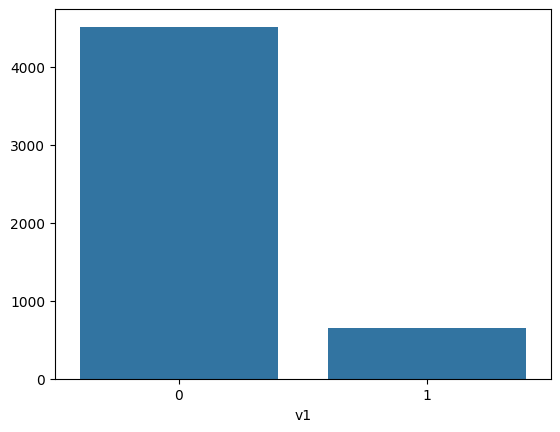

In [48]:
a = sns.barplot(x=df['v1'].value_counts().index, y=df['v1'].value_counts().values)

In [49]:
X = df['v2']
y = df['v1']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

features = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [56]:
X_train_feature = features.fit_transform(X_train)
X_test_feature = features.transform(X_test)

In [60]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(), 
    'KNeighbors Classifier': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support vector': SVC()
}

model_result = {}
for model_name, model in models.items():
    model.fit(X_train_feature,y_train)
    y_pred = model.predict(X_test_feature)

    accuracy = accuracy_score(y_test, y_pred)

    model_result[model_name] = accuracy   

In [61]:
pd.DataFrame(model_result.items(), columns=['Model', 'Accuracy Score'])

,Model,Accuracy Score
0,Random Forest,0.966151
1,Logistic Regression,0.943907
2,KNeighbors Classifier,0.903288
3,Decision Tree,0.943907
4,Support vector,0.966151


96% accuracy in RandomForestClassifier and Support vector calssifier

Classification report for svm and randomforest

In [62]:
knn_model = KNeighborsClassifier()
svm_model = SVC()

In [64]:
knn_model.fit(X_train_feature, y_train)
knn_pred = knn_model.predict(X_test_feature)

In [65]:
print('KNeighbors Classifier Classification Report:')
print(classification_report(y_test, knn_pred))

KNeighbors Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       899
           1       1.00      0.26      0.41       135

    accuracy                           0.90      1034
   macro avg       0.95      0.63      0.68      1034
weighted avg       0.91      0.90      0.88      1034



In [66]:
svm_model.fit(X_train_feature, y_train)
svm_pred = svm_model.predict(X_test_feature)

In [67]:
print('SVM Classification Report:')
print(classification_report(y_test, svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       899
           1       0.97      0.76      0.85       135

    accuracy                           0.97      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034

